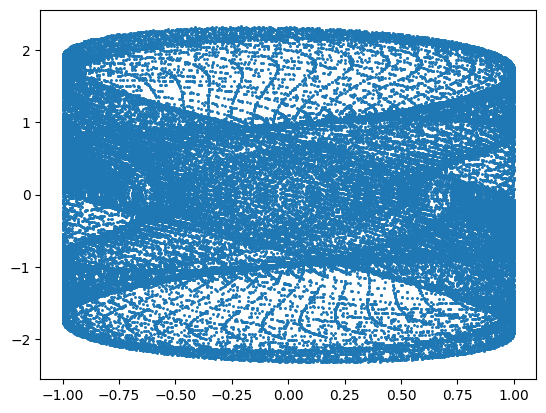

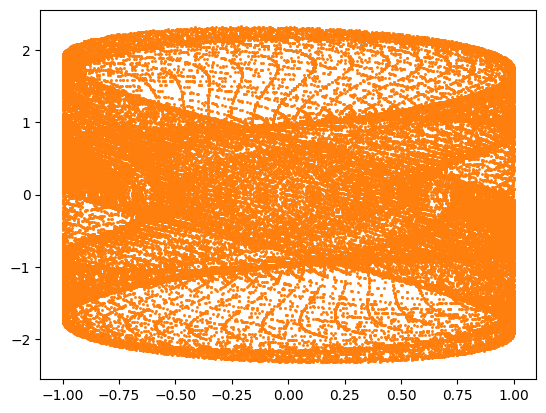

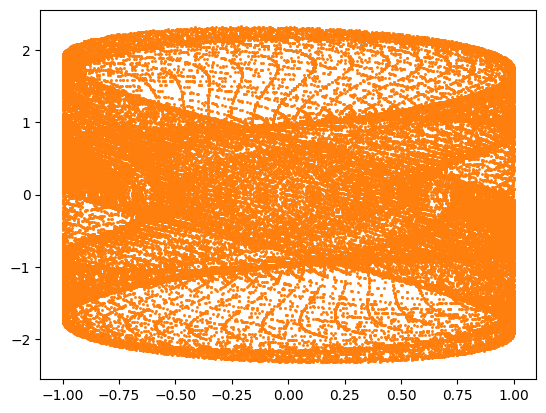

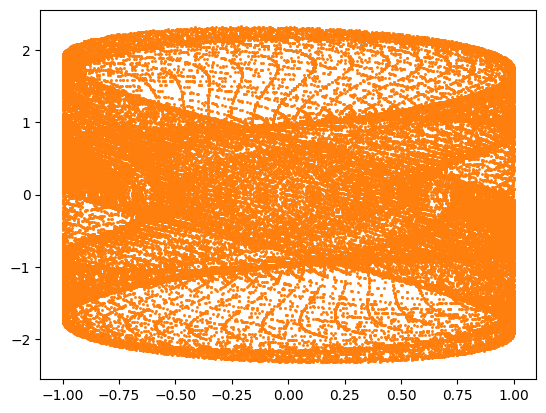

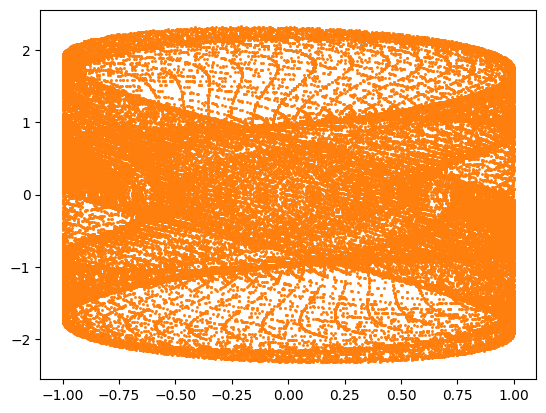

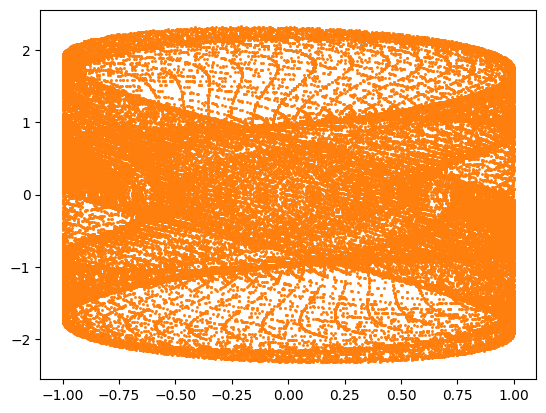

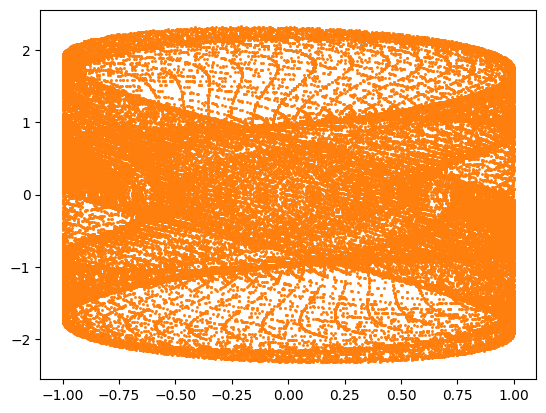

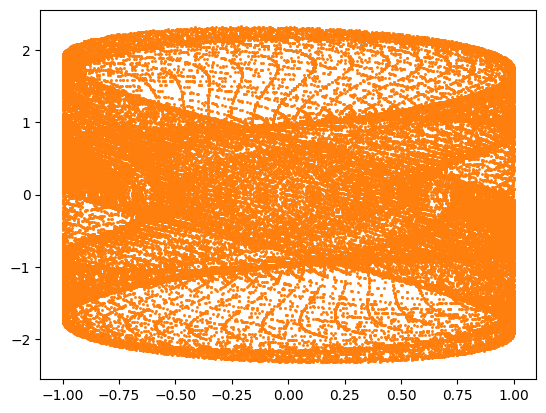

1.62 s ± 28.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


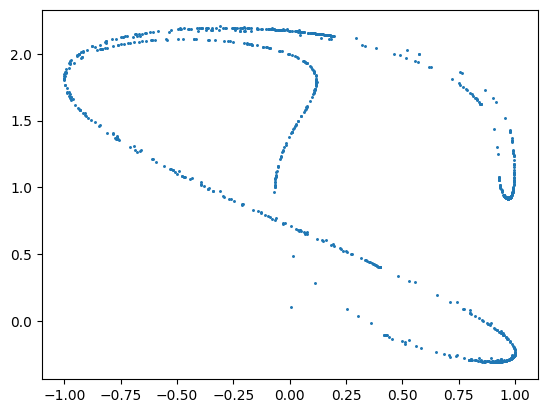

In [6]:
%%timeit
import numpy as np
import math
import matplotlib.pyplot as plt

PI = math.pi

Q = 2.0
A = 1.15
driving_freq = 0.67

theta = 0
omega = 0

iterations = 100000

thetas = np.zeros(iterations)
omegas = np.zeros(iterations)

driving_period = 2 * PI / driving_freq
steps_per_period = 100
timestep = driving_period/steps_per_period

time = 0

def ODE1(theta, omega, Q, A, driving_freq, t):
    dtheta = omega
    return dtheta

def ODE2(theta, omega, Q, A, driving_freq, t):
    domega = -omega/Q - np.sin(theta) + A * np.cos(driving_freq * t)
    return domega

# Runge-Kutta 4th order
for i in range(iterations):
    k11 = timestep * ODE1(theta, omega, Q, A, driving_freq, time)
    k12 = timestep * ODE2(theta, omega, Q, A, driving_freq, time)

    k21 = timestep * ODE1(theta + k11/2, omega + k12/2, Q, A, driving_freq, time + timestep/2)
    k22 = timestep * ODE2(theta + k11/2, omega + k12/2, Q, A, driving_freq, time + timestep/2)

    k31 = timestep * ODE1(theta + k21/2, omega + k22/2, Q, A, driving_freq, time + timestep/2)
    k32 = timestep * ODE2(theta + k21/2, omega + k22/2, Q, A, driving_freq, time + timestep/2)

    k41 = timestep * ODE1(theta + k31, omega + k32, Q, A, driving_freq, time + timestep)
    k42 = timestep * ODE2(theta + k31, omega + k32, Q, A, driving_freq, time + timestep)

    # Update theta and omega 
    theta = theta + 1/6 * (k11 + 2 * k21 + 2 * k31 + k41)
    omega = omega + 1/6 * (k12 + 2 * k22 + 2 * k32 + k42)

    time = time + timestep

    thetas[i] = theta
    omegas[i] = omega

plt.scatter(np.sin(thetas), omegas, marker='.', s=5)
plt.show()

poincare_thetas = np.sin(thetas[::steps_per_period])
poincare_omegas = omegas[::steps_per_period]
plt.scatter(poincare_thetas, poincare_omegas, marker='.', s=5)